In [6]:
import pandas as pd

# Load the dataset
data_life_expectancy = pd.read_csv('Life Expectancy Data.csv')  # Replace with your actual file path

# Drop non-numeric and irrelevant columns for correlation calculation
# Include 'Country', 'Year', 'Status' in the drop to keep only numeric data.
correlation_data = data_life_expectancy.drop(['Country', 'Year', 'Status'], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlation values for Life Expectancy
life_expectancy_corr = correlation_matrix['Life expectancy '].drop('Life expectancy ')

# Print the correlation values
print("Correlation of independent variables with Life Expectancy:")
print(life_expectancy_corr.sort_values(ascending=False))

Correlation of independent variables with Life Expectancy:
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


In [11]:
# Drop non-numeric and irrelevant columns
independent_variables = data_life_expectancy.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1)

# Calculate correlation matrix only on numeric columns
correlation_matrix = independent_variables.corr()  # Changed from data_life_expectancy to independent_variables

# Extract correlation values for Life Expectancy
# Since we dropped 'Life expectancy ', we need to merge it back for correlation calculation
correlation_with_life_expectancy = pd.concat([independent_variables, data_life_expectancy['Life expectancy ']], axis=1).corr()

life_expectancy_corr = correlation_with_life_expectancy['Life expectancy '].drop('Life expectancy ')

# Print the correlation values
print("Correlation of independent variables with Life Expectancy:")
print(life_expectancy_corr.sort_values(ascending=False))

Correlation of independent variables with Life Expectancy:
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

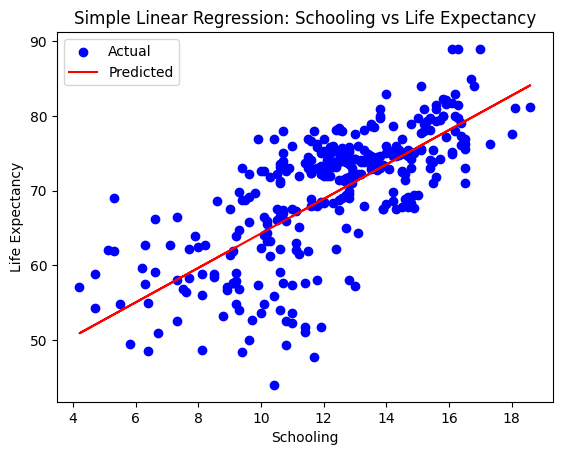

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')  # Replace with your file path

# Display basic information
print(data.info())

# Drop rows with missing values
data = data.dropna()

# Define the dependent variable (target) and independent variables (features)
X = data.drop(['Life expectancy '], axis=1)  # Drop the target variable
y = data['Life expectancy ']  # Target variable

# For simplicity, drop non-numerical columns (like country or categorical columns)
X = X.select_dtypes(include=['float64', 'int64'])

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- Simple Linear Regression --------
# Use only one feature for simple linear regression (e.g., 'Schooling')
X_simple = X[['Schooling']]  # Select one feature
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

# Train the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
print("Simple Linear Regression:")
print(f"Intercept: {simple_model.intercept_}")
print(f"Coefficient: {simple_model.coef_[0]}")
print(f"Mean Squared Error: {mean_squared_error(y_test_simple, y_pred_simple)}")
print(f"R2 Score: {r2_score(y_test_simple, y_pred_simple)}")

# -------- Multiple Linear Regression --------
# Train the model
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

# Make predictions
y_pred_multiple = multiple_model.predict(X_test)

# Evaluate the model
print("\nMultiple Linear Regression:")
print(f"Intercept: {multiple_model.intercept_}")
print(f"Coefficients: {multiple_model.coef_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_multiple)}")
print(f"R2 Score: {r2_score(y_test, y_pred_multiple)}")

# -------- Visualization for Simple Regression --------
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Simple Linear Regression: Schooling vs Life Expectancy')
plt.legend()
plt.show()


Simple Linear Regression with Income Composition:
Intercept: 48.136254009871074
Coefficient: 33.489354018967006
Mean Squared Error: 27.94416002350568
R2 Score: 0.6065448818407314

Multiple Linear Regression with BMI and Income Composition:
Intercept: 47.5774511608909
Coefficients: [ 0.10986105 27.73638365]
Mean Squared Error: 26.420489278055275
R2 Score: 0.6279982392750839


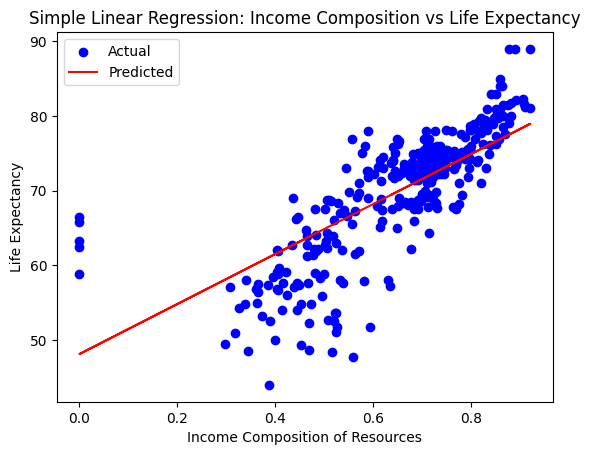

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')  # Replace with your file path

# Drop rows with missing values
data = data.dropna()

# Define the dependent variable (target) and independent variables (features)
y = data['Life expectancy ']  # Target variable

# -------- Simple Linear Regression with Income Composition --------
# Use only Income Composition as the independent variable
X_simple_income = data[['Income composition of resources']]

# Split the dataset into training and testing sets
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(
    X_simple_income, y, test_size=0.2, random_state=42
)

# Train the Simple Linear Regression model
simple_model_income = LinearRegression()
simple_model_income.fit(X_train_income, y_train_income)

# Make predictions
y_pred_income = simple_model_income.predict(X_test_income)

# Evaluate the Simple Linear Regression model
print("Simple Linear Regression with Income Composition:")
print(f"Intercept: {simple_model_income.intercept_}")
print(f"Coefficient: {simple_model_income.coef_[0]}")
print(f"Mean Squared Error: {mean_squared_error(y_test_income, y_pred_income)}")
print(f"R2 Score: {r2_score(y_test_income, y_pred_income)}")

# -------- Multiple Linear Regression with BMI and Income Composition --------
# Use BMI and Income Composition of Resources as the independent variables
# Use the actual column name for 'BMI' from your dataset (e.g., ' BMI ')
X_multiple = data[[' BMI ', 'Income composition of resources']]  # Corrected column name for BMI

# Split the dataset into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

# Train the Multiple Linear Regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train_multiple)

# Make predictions
y_pred_multiple = multiple_model.predict(X_test_multiple)

# Evaluate the Multiple Linear Regression model
print("\nMultiple Linear Regression with BMI and Income Composition:")
print(f"Intercept: {multiple_model.intercept_}")
print(f"Coefficients: {multiple_model.coef_}")
print(f"Mean Squared Error: {mean_squared_error(y_test_multiple, y_pred_multiple)}")
print(f"R2 Score: {r2_score(y_test_multiple, y_pred_multiple)}")

# -------- Visualization for Simple Linear Regression --------
plt.scatter(X_test_income, y_test_income, color='blue', label='Actual')
plt.plot(X_test_income, y_pred_income, color='red', label='Predicted')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Simple Linear Regression: Income Composition vs Life Expectancy')
plt.legend()
plt.show()